<a href="https://colab.research.google.com/github/BretsCampos/Projetos_Data_Science/blob/master/Exemplo_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Bibliotecas

In [ ]:
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

Passo a passo do K-Means 

---


Conjunto de Dados - Exemplo

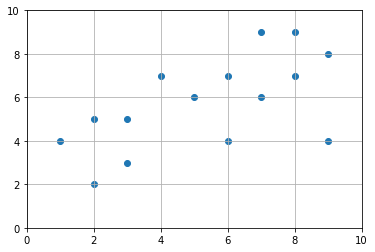

In [ ]:
dataset = np.array([[1,4],[2,2],[2,5],[3,3],[3,5],[4,7],[5,6],[6,4],[6,7],[7,6],[7,9],[8,7],[8,9],[9,4],[9,8]])
plt.scatter(dataset[:,0], dataset[:,1])
plt.xlim(0,10)
plt.ylim(0,10)
plt.grid()

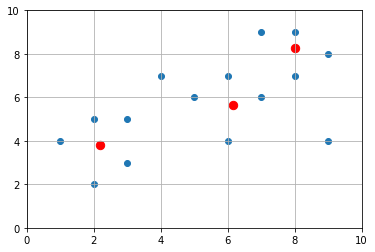

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(dataset)

plt.scatter(dataset[:,0], dataset[:,1])
plt.xlim(0,10)
plt.ylim(0,10)
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()



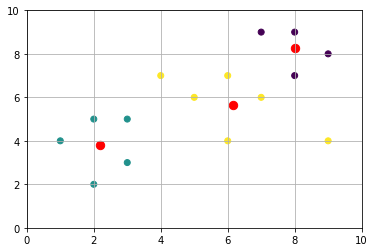

In [ ]:
plt.scatter(dataset[:,0], dataset[:,1], c=pred_y)
plt.xlim(0,10)
plt.ylim(0,10)
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()

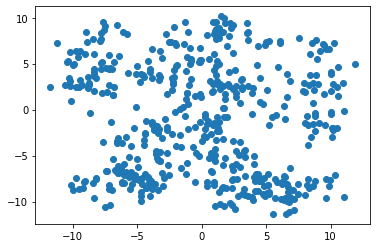

In [ ]:
X, y = make_blobs(n_samples=500, centers=50, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

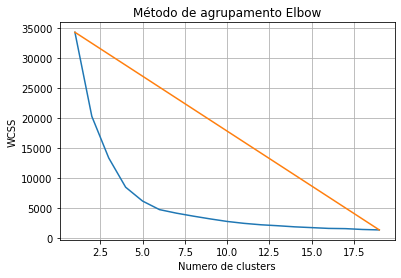


Número ideal de Clusters: 5


In [ ]:
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Método de agrupamento Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

n = optimal_number_of_clusters(wcss)

print('\nNúmero ideal de Clusters:', n ) 



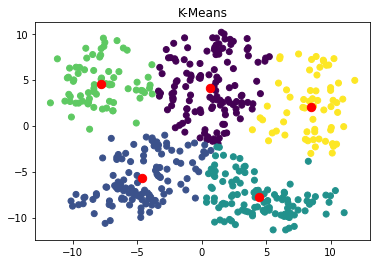

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.title('K-Means')
plt.show()